This Jupyter notebook explores a dataset likely related to global energy trends. Here's a breakdown of the code and its purpose:


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

Load Dataset:
    
    Reads the CSV file "Energy_Data1.csv" into a Pandas DataFrame named dataset.

In [2]:
dataset= pd.read_csv("Energy Data1.csv") # Read dataset

Exploratory Data Analysis (EDA):

    a. Head:
        dataset.head(): Displays the first few rows of the dataset to get a glimpse of the data structure and column names.

In [3]:
# explolatory data analysis
dataset.head()

,Year,Energy Related CO2missions (Gigatonnes),Oil Production (Million barrels per day),Natural Gas Production (Billion Cubic Metres),Coal Production (million tons),Electricity Generation (Terawatt-hours),Hydroelectricity consumption in TWh,Nuclear energy consumption in TWh,Installed Solar Capacity (GW),Installed Wind Capacity in GW
0,1991,20.6,65.44,2026.8,4481.0,"12,218",2247.96,2089.56,NaN,1.93
1,1992,20.5,65.71,2039.4,4432.0,"12,330",2240.48,2105.40,NaN,2.17
2,1993,20.6,65.99,2073.5,4327.0,"12,592",2364.56,2179.32,NaN,2.50
3,1994,20.7,66.89,2095.7,4402.0,"12,917",2382.16,2217.60,NaN,2.99
4,1995,21.3,67.85,2136.1,4557.0,"13,375",2508.44,2314.84,NaN,3.49


Missing Values:

    Prints the sum of missing values in each column, helping identify potential data cleaning needs.

In [4]:
# Check for missing values
print(dataset.isnull().sum())

Year                                             0
Energy Related CO2missions (Gigatonnes)          0
Oil Production (Million barrels per day)         0
Natural Gas Production (Billion Cubic Metres)    1
Coal Production (million tons)                   1
Electricity Generation (Terawatt-hours)          0
Hydroelectricity consumption in TWh              0
Nuclear energy consumption in TWh                0
Installed Solar Capacity (GW)                    9
Installed Wind Capacity in GW                    0
dtype: int64


Visualizations

In [5]:
# Visualizations
#import visualization modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

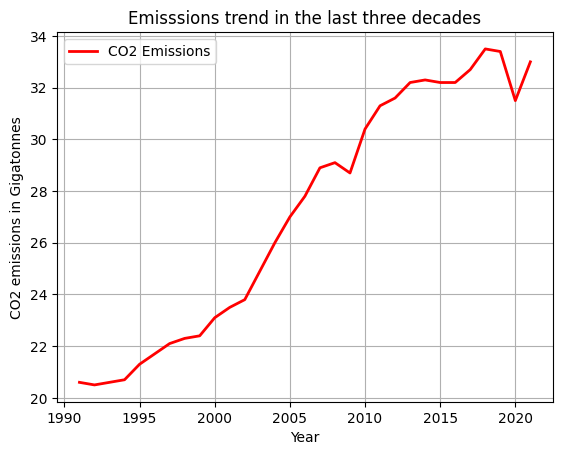

In [6]:
# CO2 emissions graph
# Plot a line graph of 'Year' on the x-axis and 'Energy Related CO2missions (Gigatonnes)' on the y-axis
plt.plot(dataset['Year'], dataset['Energy Related CO2missions (Gigatonnes)'],label='CO2 Emissions', linewidth=2, color='r')
plt.rcParams["figure.figsize"] = (8,8) # Set the figure size (width, height) in inches
plt.xlabel('Year') # Label the x-axis
plt.ylabel('CO2 emissions in Gigatonnes') # Label the y-axis
plt.title('Emisssions trend in the last three decades') # Set the title of the graph
plt.legend() # Add a legend to identify the line
plt.grid() # Add gridlines to the plot for better readability
plt.show() # Display the graph

Oil, Natural Gas and Coal Production Trend:
1. Extracts data for each fuel type:
* o = dataset['Oil Production (Million barrels per day)'] (similarly for gas and coal)
2. Creates a figure with three subplots (fig, (ax1, ax2, ax3) = plt.subplots(3,sharex=True, figsize=(20,16), constrained_layout=False)):
* Sets up a figure with three rows of subplots sharing the x-axis, with a specific figure size and layout options.
3. Adds title: ax1.set_title('Oil, Gas and Coal production over the last three decades')
4. Creates subplots for each fuel type:
* Each subplot sets gridlines, labels (x and y), line plot with color and width, and legend entries.

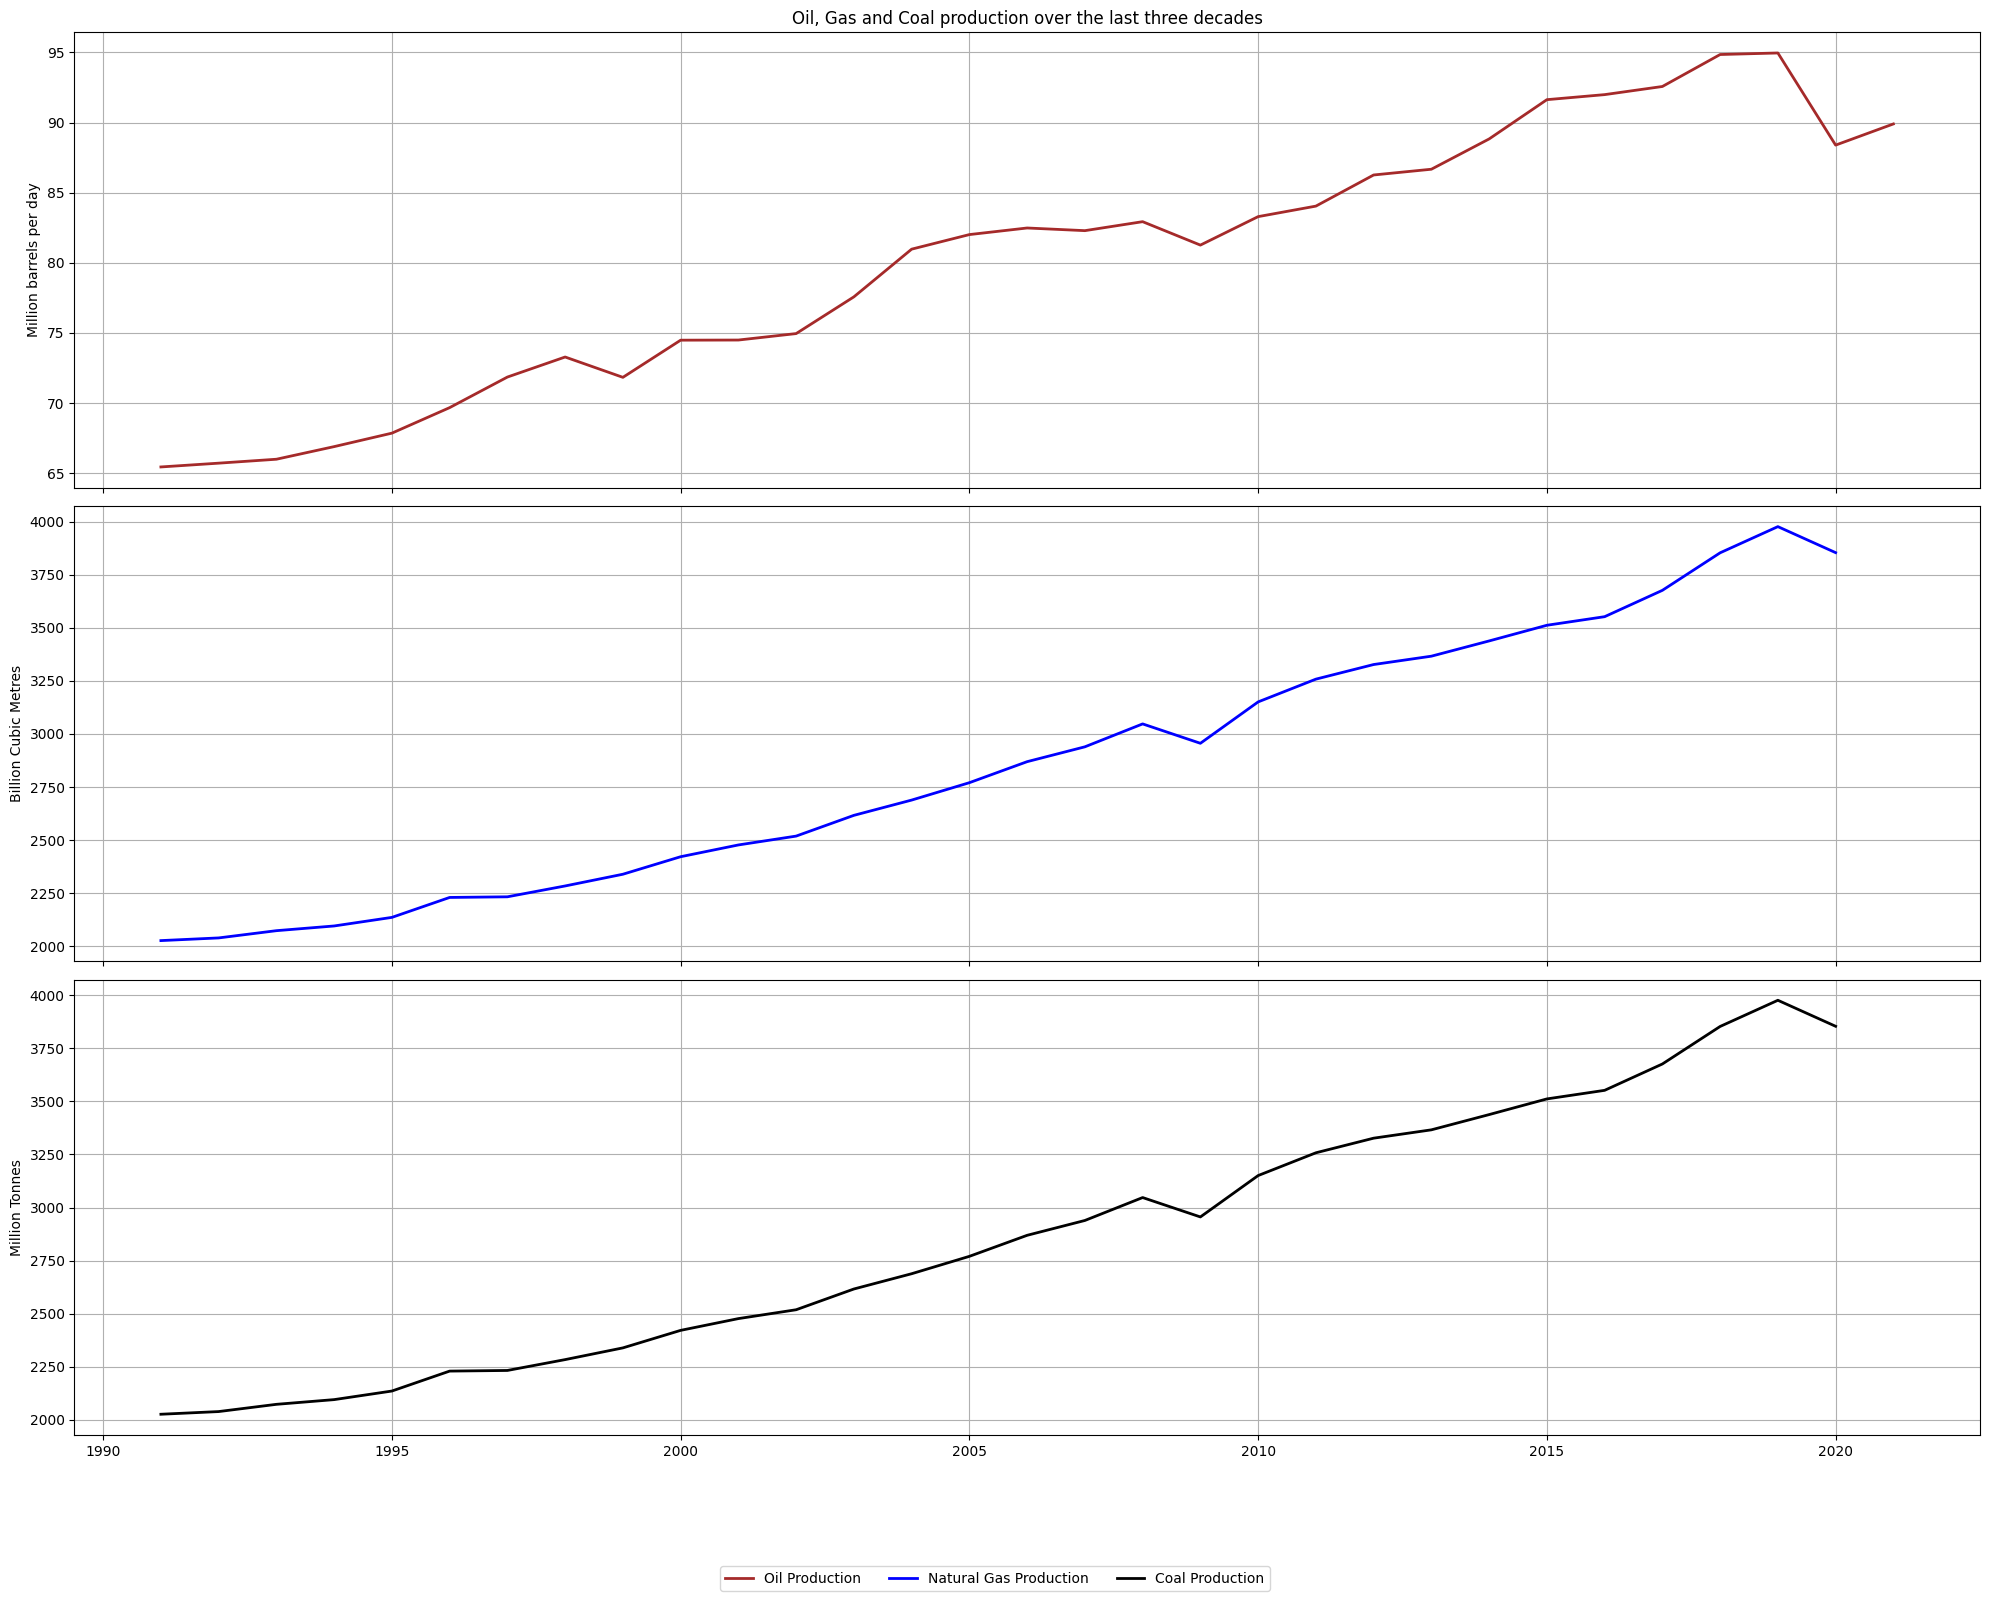

In [7]:
# Oil, Natural gas and Coal Production Trend

o=dataset['Oil Production (Million barrels per day)']
g=dataset['Natural Gas Production (Billion Cubic Metres)']
c= dataset['Coal Production (million tons)']
y=dataset['Year']

# create a figure plot with three subplots
fig, (ax1, ax2, ax3)= plt.subplots(3,sharex=True, figsize=(20,16), constrained_layout=False)


#add title
ax1.set_title('Oil, Gas and Coal production over the last three decades')

#subplot for oil production
ax1.grid()
ax1.set_ylabel('Million barrels per day')
l1, = ax1.plot(y, o, color='brown',lw=2,label='Oil Production')

#subplot for natural gas production
ax2.grid()
l2, = ax2.plot(y, g, color='blue',lw=2,label='Coal production')
ax2.set_ylabel('Billion Cubic Metres')

# subplot for coal production
ax3.grid()
l3, = ax3.plot(y, g, color='black',lw=2,label='Coal production')
ax3.set_ylabel('Million Tonnes')

labels=['Oil Production','Natural Gas Production', 'Coal Production']
fig.tight_layout() 
fig.subplots_adjust(bottom=0.1) 
fig.legend(labels=labels, loc="lower center", ncol=4)

plt.show()

In [8]:
# Plot For Total Electricity Generated, Total Electricity Generated from Hydro and Nuclear
#convert electricity generated into object data type
#first remove the comma between the numbers to enable conversion to numeric format.
dataset['Electricity Generation (Terawatt-hours)']=dataset['Electricity Generation (Terawatt-hours)'].str.replace(',','')
# then convert the column to numeric
dataset['Electricity Generation (Terawatt-hours)']=pd.to_numeric(dataset['Electricity Generation (Terawatt-hours)'])

In [9]:
# Extracts data for different generation types:
e=dataset['Electricity Generation (Terawatt-hours)']
h=dataset['Hydroelectricity consumption in TWh']
n= dataset['Nuclear energy consumption in TWh']
y=dataset['Year']

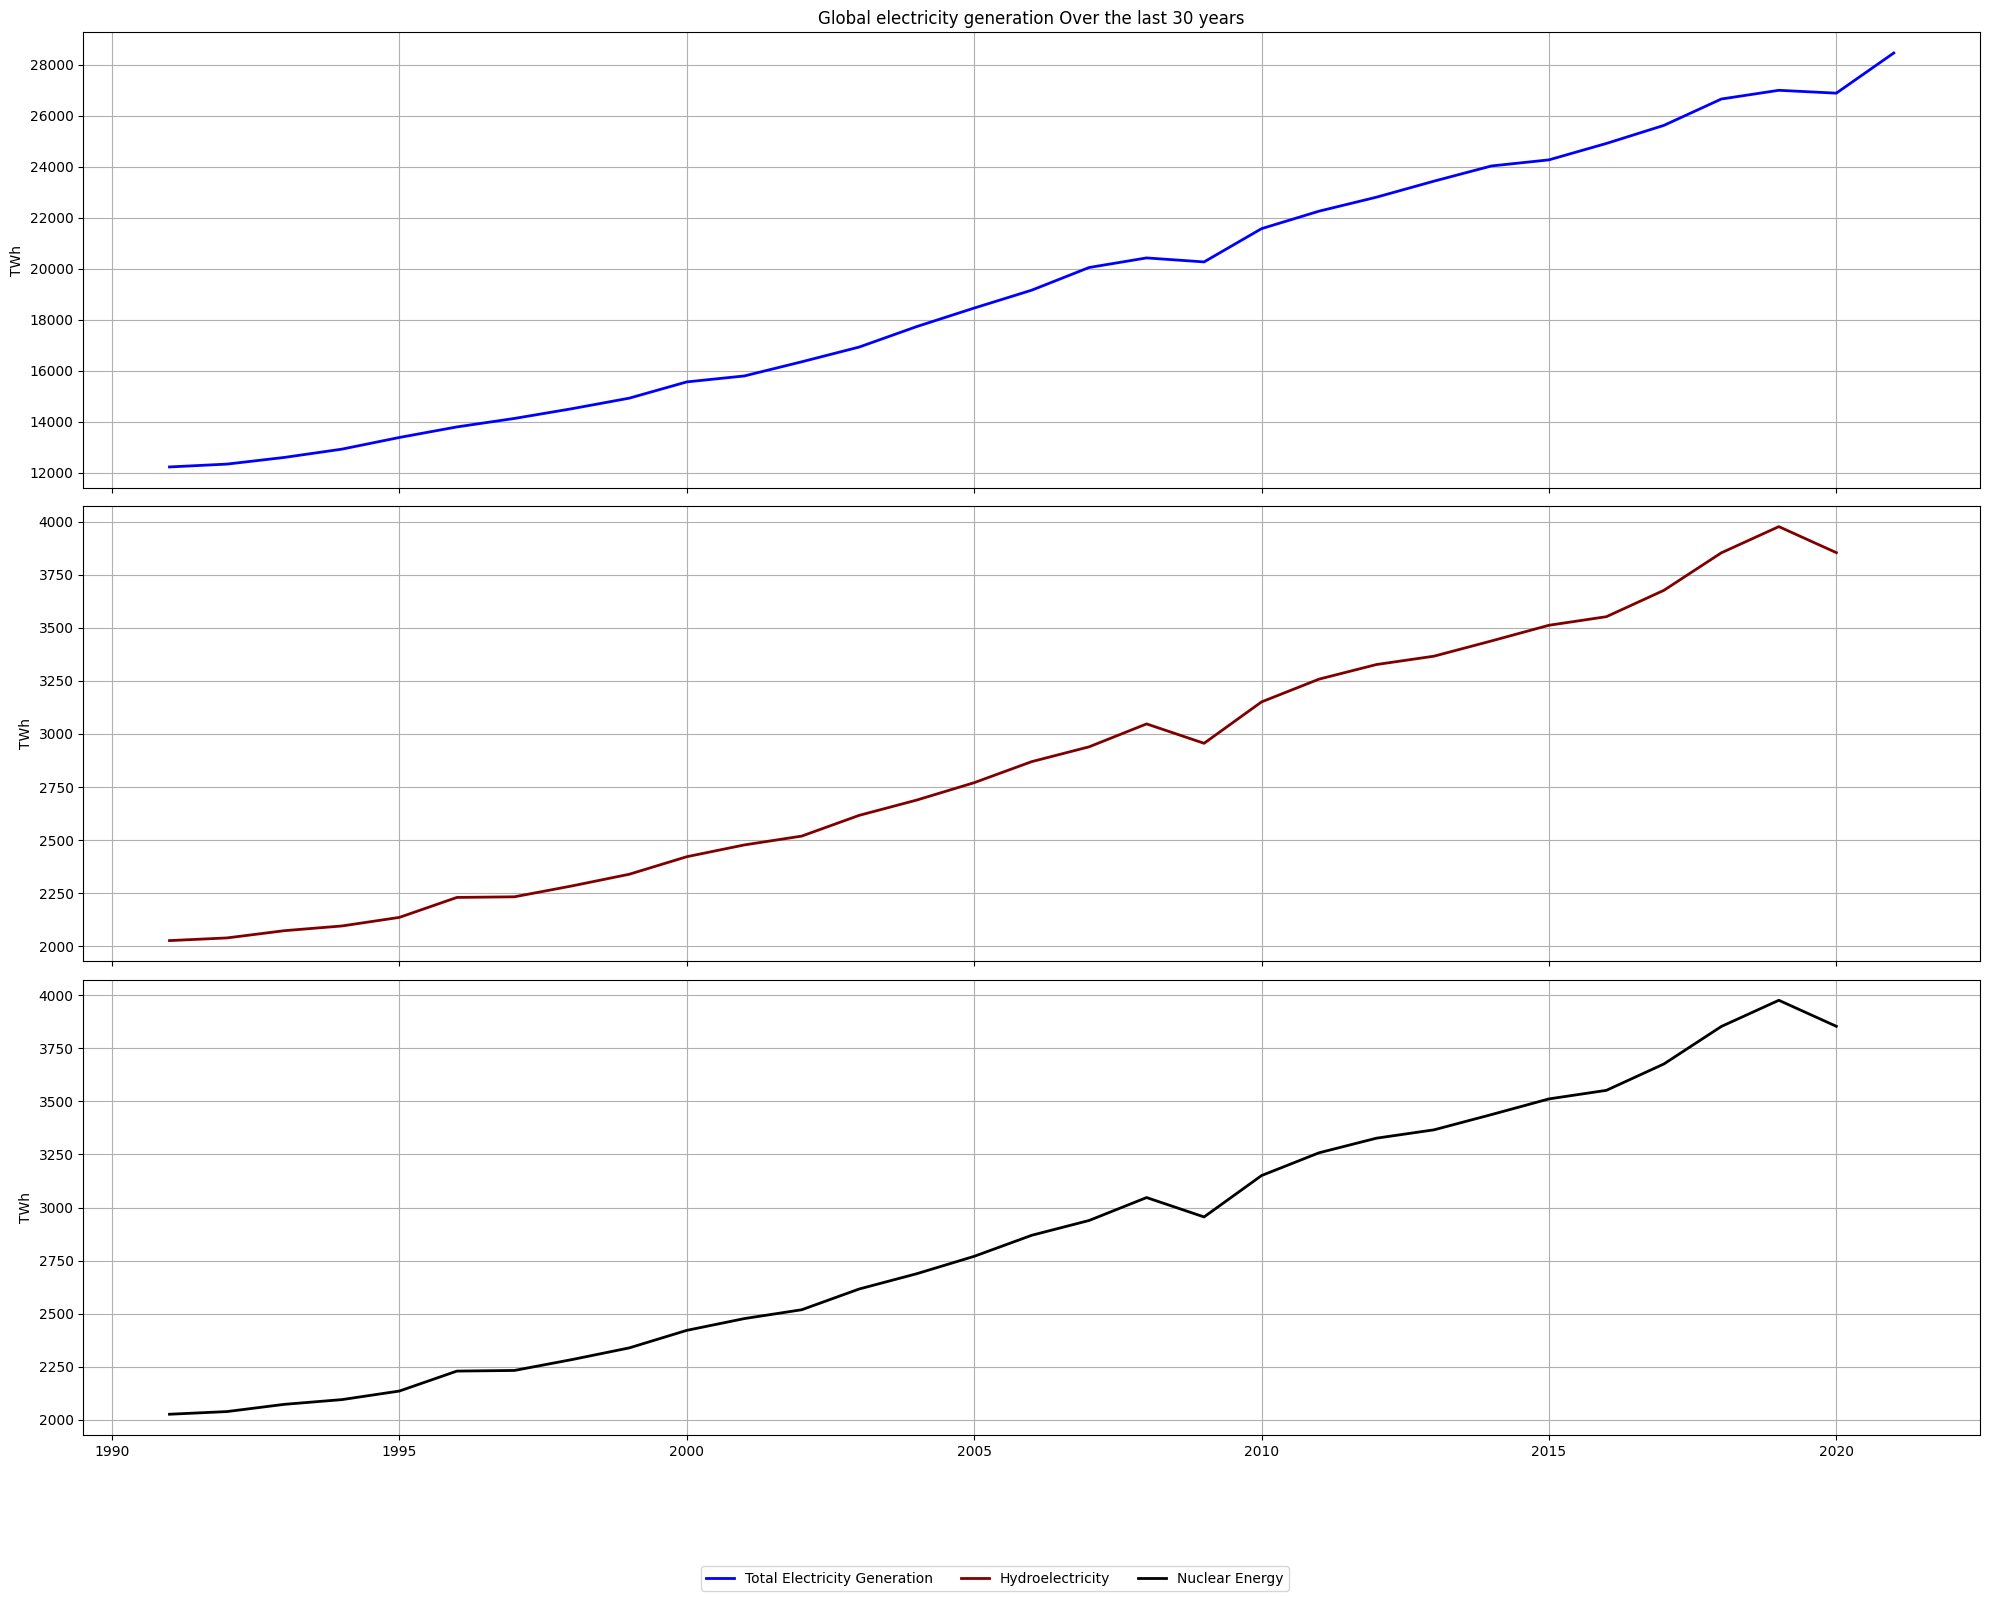

In [10]:
# create a figure plot with three subplots
fig, (ax1, ax2, ax3)= plt.subplots(3,sharex=True, figsize=(20,16), constrained_layout=False)

#add title
ax1.set_title('Global electricity generation Over the last 30 years')
#subplot for total electricity generated
ax1.grid()
ax1.set_ylabel('TWh')
l1, = ax1.plot(y, e, color='blue',lw=2)

#subplot for electricity generated from hydroelectiricy
ax2.grid()
l2, = ax2.plot(y, g, color='maroon',lw=2)
ax2.set_ylabel('TWh')

# subplot for electricity generated from nuclear energy
ax3.grid()
l3, = ax3.plot(y, g, color='black',lw=2)
ax3.set_ylabel('TWh')

labels=['Total Electricity Generation','Hydroelectricity', 'Nuclear Energy']
fig.tight_layout() 
fig.subplots_adjust(bottom=0.1)   ##  Need to play with this number.
fig.legend(labels=labels, loc="lower center", ncol=4)


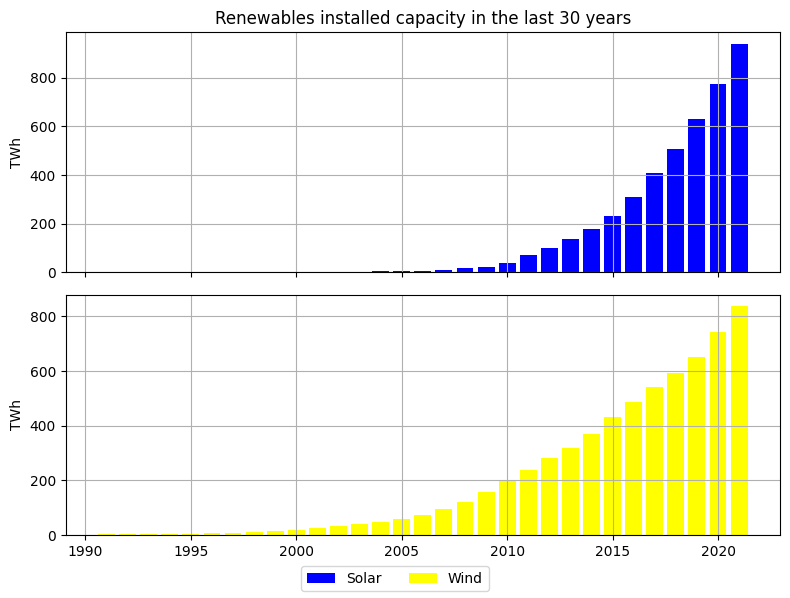

In [11]:
s=dataset['Installed Solar Capacity (GW)']
w=dataset['Installed Wind Capacity in GW']
y=dataset['Year']

# create a figure plot with two subplots
fig, (ax1, ax2)= plt.subplots(2,sharex=True, figsize=(8,6), constrained_layout=False)


#add title
ax1.set_title('Renewables installed capacity in the last 30 years')

#subplot for Solar energy installed capacity
ax1.grid()
ax1.set_ylabel('TWh')
ax1.bar(y,s, color='blue',lw=2)

#subplot for Wind energy installed Capacity
ax2.grid()
ax2.bar(y, w, color='yellow',lw=2)
ax2.set_ylabel('TWh')


labels=['Solar','Wind']
fig.tight_layout() 
fig.subplots_adjust(bottom=0.1)  
fig.legend(labels=labels, loc="lower center", ncol=3)

plt.show()


In [12]:
# Statistical operations:

In [13]:
# Calculate summary statistics
print(dataset.describe())

              Year  Energy Related CO2missions (Gigatonnes)  \
count    31.000000                                31.000000   
mean   2006.000000                                27.138710   
std       9.092121                                 4.754414   
min    1991.000000                                20.500000   
25%    1998.500000                                22.350000   
50%    2006.000000                                27.800000   
75%    2013.500000                                31.900000   
max    2021.000000                                33.500000   

       Oil Production (Million barrels per day)  \
count                                 31.000000   
mean                                  80.171613   
std                                    9.261791   
min                                   65.440000   
25%                                   72.565000   
50%                                   82.010000   
75%                                   87.530000   
max                     

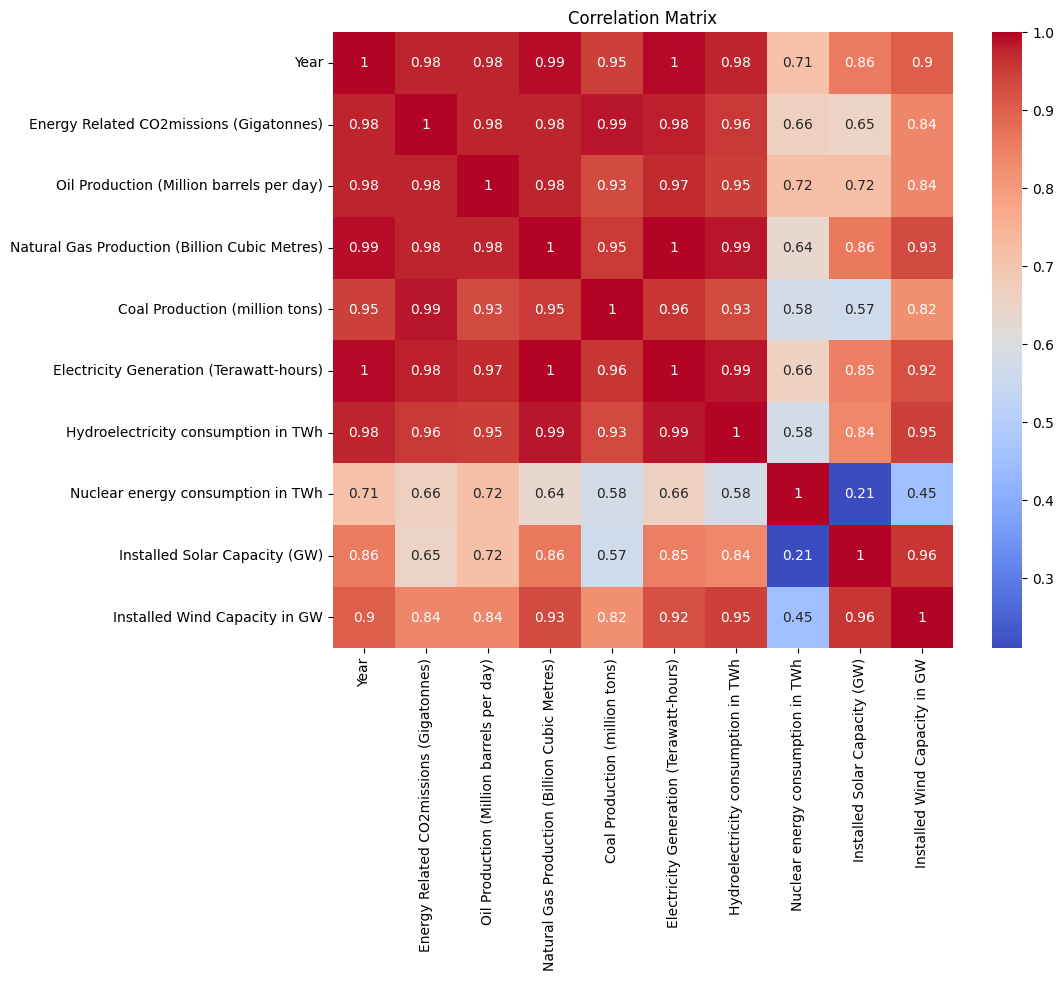

In [14]:
# Calculate correlation between variables
correlation_matrix = dataset.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()   

 Comparing Gas Prices Across Regions

Scenario:

Let's consider a scenario where we want to compare the average gas prices across three different regions: the United States, Europe, and Asia. We have collected data on the weekly average gas prices for a specific period.

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = {'Region': ['US', 'Europe', 'Asia'] * 10,
        'Price': [3.0, 3.5, 2.8, 3.2, 3.7, 2.5, 3.3, 3.8, 2.7, 3.1, 
                  4.0, 4.5, 3.8, 4.2, 4.7, 3.5, 4.3, 4.8, 3.7, 4.1,
                  2.5, 3.0, 2.3, 2.7, 3.2, 2.0, 2.8, 3.3, 2.2, 2.6]}

df = pd.DataFrame(data)

In [16]:
# One-way ANOVA
model = ols('Price ~ Region', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
print(anova_table)


            df     sum_sq   mean_sq         F    PR(>F)
Region     2.0   0.116667  0.058333  0.095559  0.909171
Residual  27.0  16.482000  0.610444       NaN       NaN


In [17]:
# Post-hoc tests (Tukey's HSD)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [18]:
tukey = pairwise_tukeyhsd(endog=df['Price'], groups=df['Region'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  Asia Europe     0.15 0.9038 -0.7163 1.0163  False
  Asia     US     0.05 0.9888 -0.8163 0.9163  False
Europe     US     -0.1 0.9559 -0.9663 0.7663  False
---------------------------------------------------


In [19]:
# references:
# https://www.kaggle.com/code/iannjuguna/energy-and-emissions/notebook